<a href="https://colab.research.google.com/github/ZeeMurphy/Data110/blob/main/Week_10_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [334]:
df=pd.read_csv('https://raw.githubusercontent.com/ZeeMurphy/Data110-22016/refs/heads/main/dataset/Daily_Arrests_20241001%20(1).csv')

In [335]:
df.head()

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
0,ENCARNAION HERASME,LUIS,NaN,24,Block Of 6841 TREXLEY,ASHFORK,MD,09/19/2024,VIOLATE PROTECTIVE ORDER
1,DEL CID-PALACIOS,JEFFREY,MITCHELL,34,11700 Block Of Leona St,SILVER SPRING,MD,09/19/2024,INTIMIDATE/INFLU JUROR-FELONY OFF
2,CHAVEZ,SANDRA,NaN,21,0 Block Of Silver Kettle Court,GAITHERSBURG,MD,09/19/2024,ASSAULT-SECOND DEGREE
3,PEREZ GONZALES,JOSE,NaN,37,12900 Block Of TWINBROOK PKWY,ROCKVILLE,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
4,SIMON,DAVID,BRETT,74,12800 Block Of BRUSHWOOD TERR,Potomac,MD,09/19/2024,DRIVING UNINSURED VEHICLE


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LAST NAME    473 non-null    object
 1   FIRST NAME   473 non-null    object
 2   MIDDLE NAME  376 non-null    object
 3   AGE          473 non-null    int64 
 4   STREET       473 non-null    object
 5   CITY         473 non-null    object
 6   STATE        473 non-null    object
 7   ARREST DATE  473 non-null    object
 8   OFFENSE      473 non-null    object
dtypes: int64(1), object(8)
memory usage: 33.4+ KB


In [337]:
df.describe()

,AGE
count,473.000000
mean,34.012685
std,12.233595
min,16.000000
25%,25.000000
50%,31.000000
75%,41.000000
max,86.000000


In [338]:
df.isna().sum()

,0
LAST NAME,0
FIRST NAME,0
MIDDLE NAME,97
AGE,0
STREET,0
CITY,0
STATE,0
ARREST DATE,0
OFFENSE,0


1. **Filter Theft-Related Offenses**
   - Filter the dataset to include only rows where the `OFFENSE` column contains the word "theft".
   - Create a new DataFrame called `theft_df` for this filtered data.

In [339]:
theft_df = df[df['OFFENSE'].str.contains('theft', case=False, na=False)]
theft_df

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
3,PEREZ GONZALES,JOSE,NaN,37,12900 Block Of TWINBROOK PKWY,ROCKVILLE,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
13,CLARK,MICHAEL,ALANZOE,40,1300 Block Of new york ave,WASHINGTON,DC,09/20/2024,"THEFT: $100 TO UNDER $1,500"
14,MEJIA POSADA,RENE,ALEXANDER,26,0 Block Of NINA CT,GAITHERSBURG,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
22,ESCOBAR,DEYANIRA,HILARIA,35,400 Block Of COLLEGE PKWY,ROCKVILLE,MD,09/20/2024,"THEFT: $100 TO UNDER $1,500"
30,WEST,MAIA,FRANCESCA,28,9900 Block Of BIG ROCK RD,SILVER SPRING,MD,09/21/2024,"THEFT: $1,500 TO UNDER $25,000"
...,...,...,...,...,...,...,...,...,...
463,TAYLOR,ALEXA,LANAE,36,12400 Block Of SKY BLUE DRIVE,GERMANTOWN,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
464,CALLOWAY,ANNOINETTE,MARIA,34,8400 Block Of Colesville Rd,SILVER SPRING,MD,09/18/2024,THEFT LESS THAN $100.00
465,HARRIS,AARON,JAVON,34,13800 Block Of Castle Blvd,SILVER SPRING,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
466,MILES,COURTNEY,WILBURN,48,0 Block Of SKILLSMAN AVE,JERSEY CITY,NJ,09/18/2024,"THEFT SCHEME: $1,500 TO UNDER $25,000"


2. **Exploratory Data Analysis (EDA)**
   
   - **Task**: Answer the following questions:
     - What is the total number of theft incidents?


In [340]:
theft_df_sum = len(theft_df)
theft_df_sum

96

    - **What is the range of ages involved in theft offenses?**
  

In [341]:
#method 1 to fins the age range for theft offenses:
theft_df.describe()

,AGE
count,96.000000
mean,33.114583
std,12.169738
min,18.000000
25%,24.750000
50%,28.500000
75%,40.000000
max,67.000000


In [342]:
#method 2:
age_min = theft_df['AGE'].min()
age_min

18

In [343]:
age_max = theft_df['AGE'].max()
age_max

67

3. **Visualizing Theft Offenses by Day of the Week**


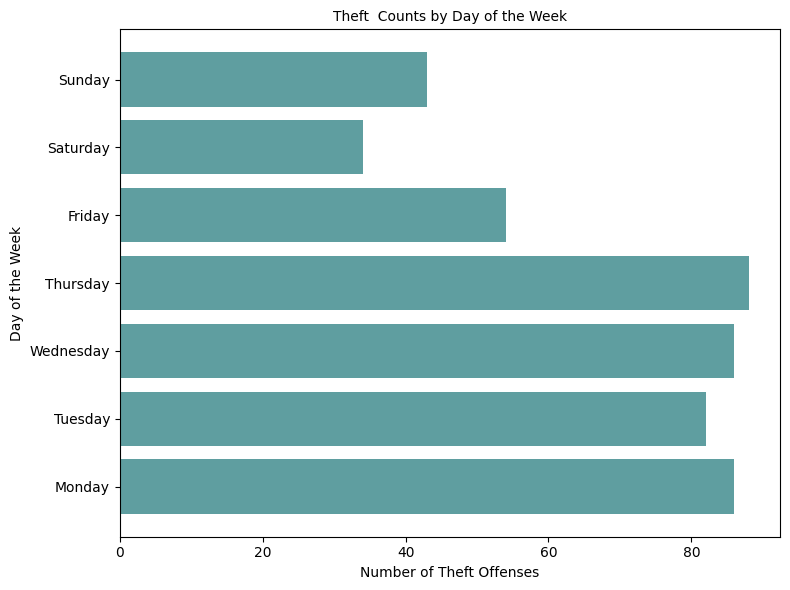

In [344]:
df['ARREST DATE'] = pd.to_datetime(df['ARREST DATE'])

df['dayOfWeek'] = df['ARREST DATE'].dt.dayofweek #to create a column as daysofweek in dataset

# Calculate the theft counts by day of the week and sort by day (0 = Monday, 6 = Sunday)
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
theft_counts = df['dayOfWeek'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.barh(theft_counts.index, theft_counts.values, color='#5f9ea0')
plt.title('Theft  Counts by Day of the Week', fontsize=10)
plt.xlabel('Number of Theft Offenses', fontsize=10)
plt.ylabel('Day of the Week', fontsize=10)
plt.yticks(ticks=range(7), labels=names, fontsize=10)
plt.tight_layout()
plt.show()



In [345]:
theft_counts = df['dayOfWeek'].value_counts().sort_index()
theft_counts

,count
dayOfWeek,
0,86
1,82
2,86
3,88
4,54
5,34
6,43


  
   - **Task**: Which day of the week has the highest number of theft arrests? What might be the reasons for this trend?

This graphs indicated that theft incidents happend mostly from Monday to Thursday and less at the end of the week and at the weekend. This trend can have severa reasons.
- During the week days, most of the people are at work so there is more opportunities for theives to commit theft crimes in residnetial places.
- People carry their laptops, phones, wallets with them during the day which increase the chance of them being targeted.
- During the weekedn people commute less or leave the house, so the chances of being robbed decreases.


      

    
    
4. **Age Distribution of Theft Offenders**
   

   - **Task**: Describe the age distribution. Which age group seems to be most involved in theft offenses?

Text(0.5, 1.0, 'Age Distribution of Theft Offenders ')

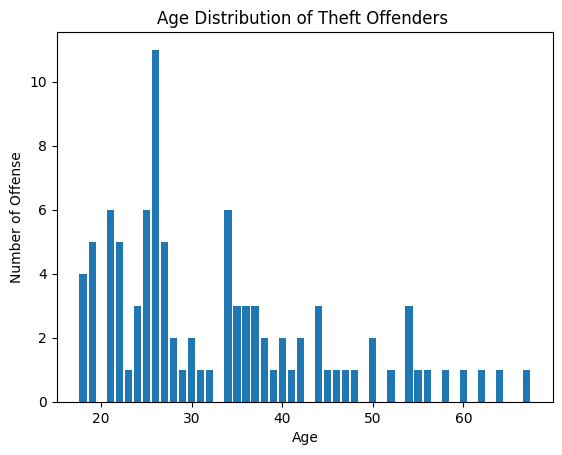

In [346]:
age_counts = theft_df['AGE'].value_counts()
plt.bar(age_counts.index,age_counts.values)
plt.xlabel('Age')
plt.ylabel('Number of Offense')
plt.title('Age Distribution of Theft Offenders ')

The age distribution is skewed to the right. The highest number of theft  are committed by people around 25-6 years old. Overal the crime rate decreases among older people above 35 years expect a few spikes here and there. A high number of crimes happens between 18-25 years old. So most of the thefts are committed by the younger generations in the range of  18-35 years old.  

5. **Offense Analysis**
   - Analyze the types of theft offenses.
   - **Task**: Use `value_counts()` on the `OFFENSE` column to find out what kinds of theft are most common. Create a bar chart to visualize this.


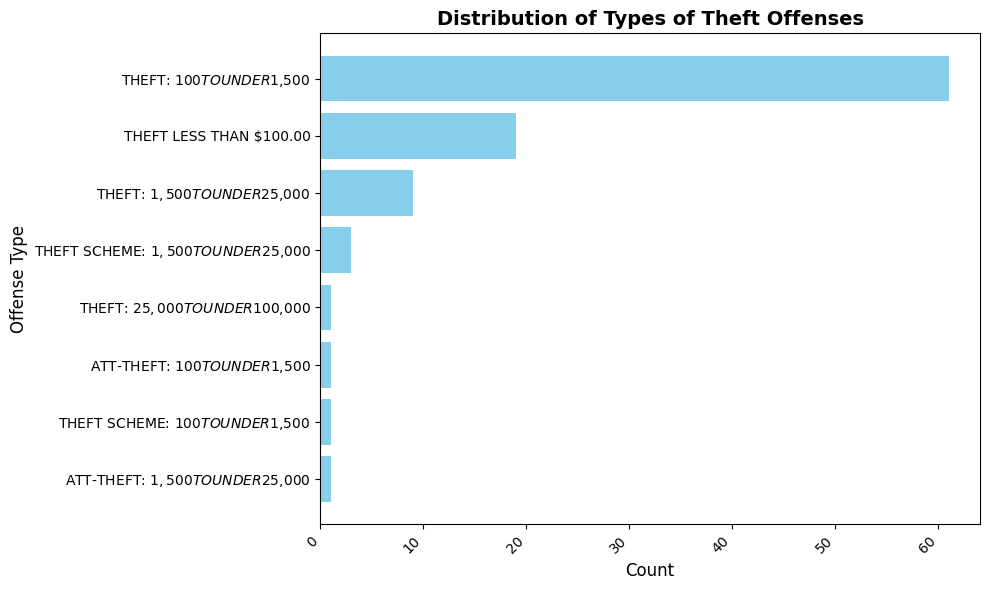

In [347]:
theft_offense_counts = theft_df['OFFENSE'].value_counts().sort_values(ascending=True) #using value_counts to find the theft kinds.
plt.figure(figsize=(10, 6))
plt.barh(y=theft_offense_counts.index, width=theft_offense_counts.values, color='skyblue')
plt.title('Distribution of Types of Theft Offenses', fontsize=14, weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Offense Type', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


The graph shows that out of 96 theft offenses, the most frequent type of theft is about 60 and belong to theft incidents where the value of the stolen goods or property falls within the range of USD100 to just below $1,500. Next frequent kind of theft is for thefts with value less than 100. We can also conclude that thefts with higher value than 1,500 is really low and rare.

6. **Can you make some other visualization related to theft offenses?**

The following bar chart shows the frequency of thefts in different cities. The graph indicates that the most significant number of thefts happened in Silver Spring. Washington, D.C. follows next. Rockville and Germantown, which have the same theft rate, are next. However, many cities have low theft rates, which indicates a good level of safety in most places.

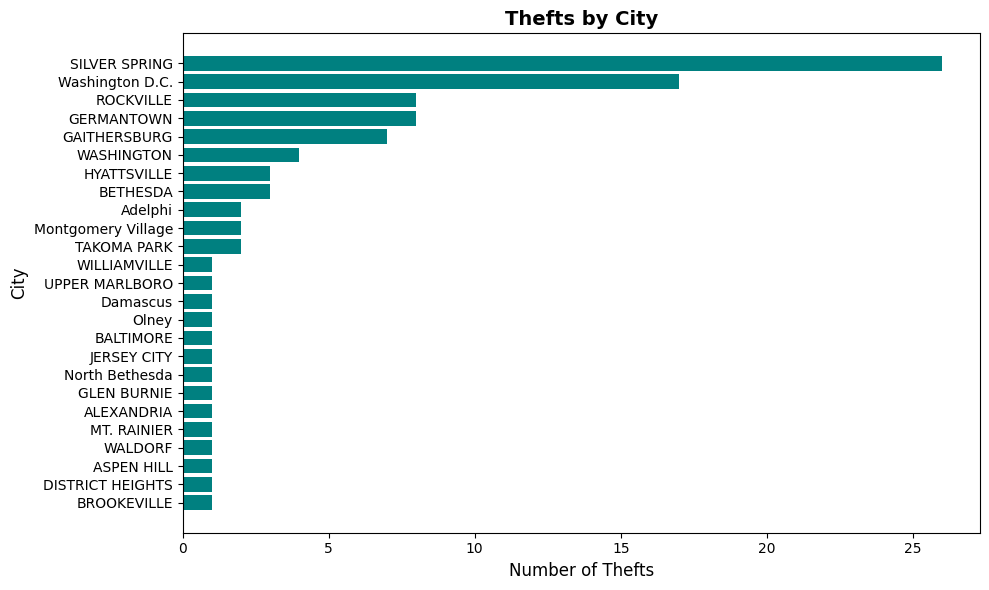

In [348]:
city_theft_counts = theft_df['CITY'].value_counts(ascending=True) #First we count the thefts per city.
plt.figure(figsize=(10, 6))
plt.barh(city_theft_counts.index, city_theft_counts.values, color='teal')
plt.title('Thefts by City', fontsize=14, weight='bold')
plt.xlabel('Number of Thefts', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

